In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

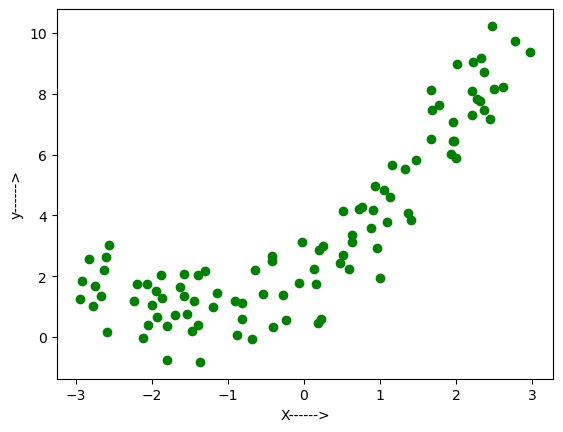

In [7]:
plt.scatter(X,y,color='green')
plt.xlabel("X------>")
plt.ylabel("y------>")
plt.show()

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 1), (20, 1), (80, 1), (20, 1))

In [11]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = model1.predict(X_test)

In [14]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.7556648015290254


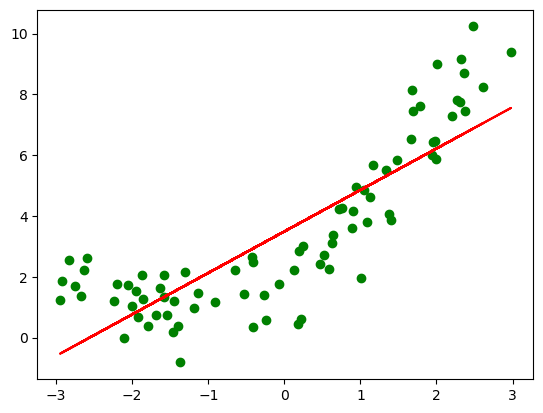

In [18]:
plt.scatter(X_train,y_train,color="green")
plt.plot(X_train,model1.predict(X_train),color="red")

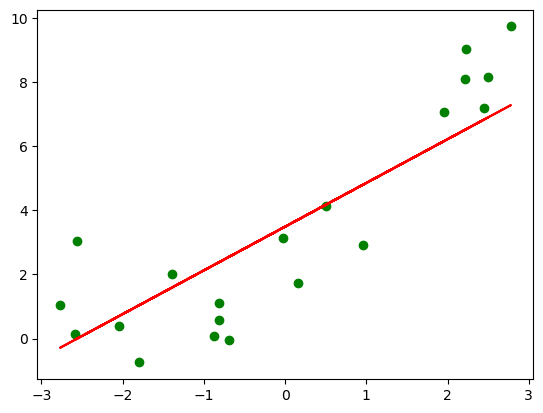

In [19]:
plt.scatter(X_test,y_test,color="green")
plt.plot(X_test,model1.predict(X_test),color="red")

In [21]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [27]:
X_train_poly # x1=-1.62878143e+00 #x1^2=2.65292894e+00

array([[ 1.00000000e+00, -1.62878143e+00,  2.65292894e+00],
       [ 1.00000000e+00, -9.10016566e-01,  8.28130151e-01],
       [ 1.00000000e+00,  2.47946887e+00,  6.14776586e+00],
       [ 1.00000000e+00,  7.59041949e-01,  5.76144681e-01],
       [ 1.00000000e+00,  1.68771401e+00,  2.84837858e+00],
       [ 1.00000000e+00, -1.39492402e+00,  1.94581301e+00],
       [ 1.00000000e+00, -2.74706287e+00,  7.54635440e+00],
       [ 1.00000000e+00,  1.67655493e+00,  2.81083642e+00],
       [ 1.00000000e+00,  1.93936436e+00,  3.76113413e+00],
       [ 1.00000000e+00,  1.94425384e-01,  3.78012299e-02],
       [ 1.00000000e+00, -2.35217959e-01,  5.53274884e-02],
       [ 1.00000000e+00,  1.37104147e+00,  1.87975472e+00],
       [ 1.00000000e+00,  1.95734454e+00,  3.83119765e+00],
       [ 1.00000000e+00,  1.08662924e+00,  1.18076311e+00],
       [ 1.00000000e+00,  6.34965521e-01,  4.03181213e-01],
       [ 1.00000000e+00, -2.00198568e+00,  4.00794667e+00],
       [ 1.00000000e+00,  8.86182113e-01

In [28]:
X_test_poly

array([[ 1.00000000e+00,  9.56108768e-01,  9.14143977e-01],
       [ 1.00000000e+00, -8.12526196e-01,  6.60198818e-01],
       [ 1.00000000e+00, -2.77018532e+00,  7.67392673e+00],
       [ 1.00000000e+00, -6.88562416e-01,  4.74118201e-01],
       [ 1.00000000e+00,  5.09629013e-01,  2.59721731e-01],
       [ 1.00000000e+00, -1.80064230e+00,  3.24231271e+00],
       [ 1.00000000e+00, -2.55759847e+00,  6.54130991e+00],
       [ 1.00000000e+00,  2.21218725e+00,  4.89377245e+00],
       [ 1.00000000e+00, -2.58723643e+00,  6.69379236e+00],
       [ 1.00000000e+00, -1.38734019e+00,  1.92471281e+00],
       [ 1.00000000e+00,  2.22496027e+00,  4.95044819e+00],
       [ 1.00000000e+00,  2.50164641e+00,  6.25823477e+00],
       [ 1.00000000e+00, -8.18243270e-01,  6.69522049e-01],
       [ 1.00000000e+00, -2.47972612e-02,  6.14904161e-04],
       [ 1.00000000e+00,  1.95578807e+00,  3.82510696e+00],
       [ 1.00000000e+00,  2.77964634e+00,  7.72643378e+00],
       [ 1.00000000e+00,  1.63599744e-01

In [29]:
model2 = LinearRegression()
model2.fit(X_train_poly,y_train)

LinearRegression()

In [30]:
y_pred = model2.predict(X_test_poly)

In [31]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.9047606036611117


In [32]:
print(model2.coef_)
print(model2.intercept_)

[[0.         1.46731822 0.49832686]]
[2.08988896]


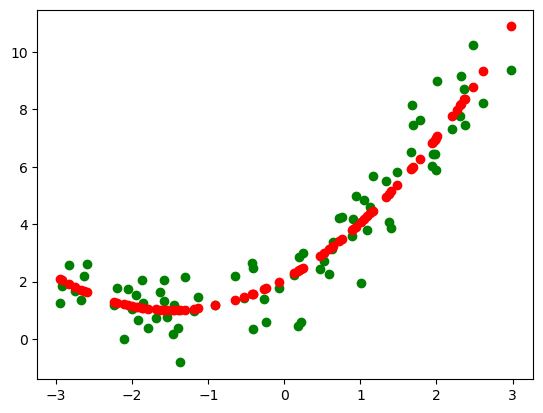

In [37]:
plt.scatter(X_train,y_train,color='green')
plt.scatter(X_train,model2.predict(X_train_poly),color="red")

In [44]:
# prediction for new data
X_new = [[5]]
X_new_poly = poly.transform(X_new)
y_new = model2.predict(X_new_poly)
print(y_new)

[[21.88465161]]


##### Pipeline

In [45]:
from sklearn.pipeline import Pipeline

In [50]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly = PolynomialFeatures(degree=degree,include_bias=True)
    model = LinearRegression()
    poly_reg = Pipeline([
        ("poly_features",poly),
        ("lin_reg",model)
    ])
    poly_reg.fit(X_train,y_train)
    y_pred_new = poly_reg.predict(X_new)
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

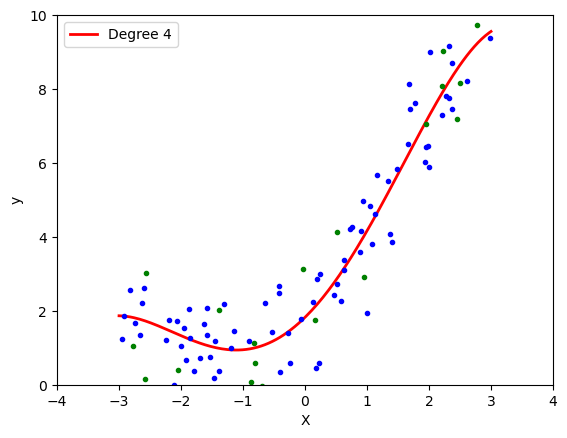

In [52]:
poly_regression(4)

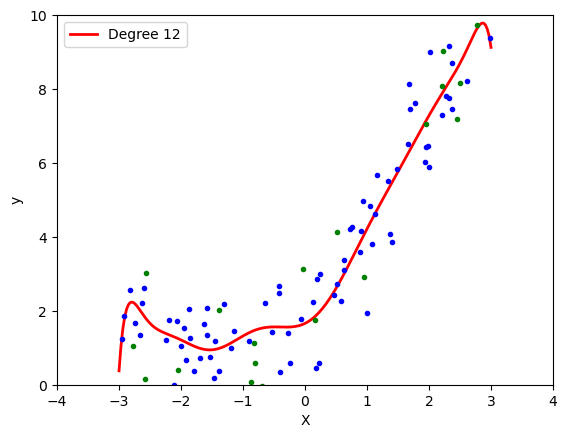

In [55]:
poly_regression(12)